<div style="max-width:66ch;">

# Lecture notes - k-means clustering

This is the lecture note for **k-means** clustering.

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to k-means clustering. I encourage you to read further about k-means. </p>

Read more:

- [Unsupervised learning - wikipedia](https://en.wikipedia.org/wiki/Unsupervised_learning)
- [Cluster analysis - wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)
- [k-means clustering - wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)
- [Color quantization - wikipedia](https://en.wikipedia.org/wiki/Color_quantization)
- [Clustering user guide - sklearn](https://scikit-learn.org/stable/modules/clustering.html#k-means)
- [KMeans - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [Find optimal k clusters - analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/)
- [Silhouette (clustering) - wikipedia](https://en.wikipedia.org/wiki/Silhouette_(clustering))
- [ISLRv2 - pp. 516-521](https://www.statlearning.com/)
---


</div>


<div style="max-width:66ch;">

## Setup
 


</div>

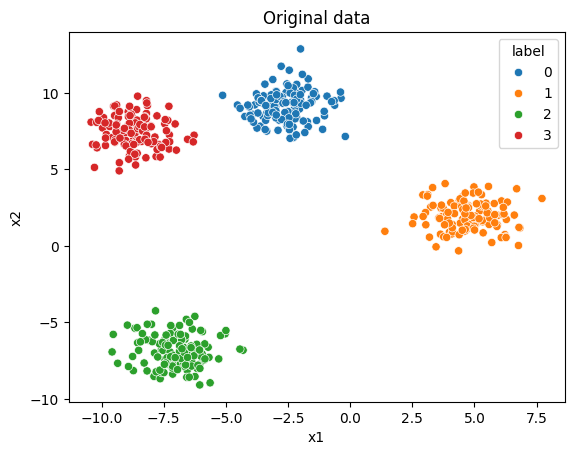

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

# , columns = ["x1", "x2", "label"])
df = pd.DataFrame([X[:, 0], X[:, 1], y]).T

df.columns = ["x1", "x2", "label"]
df["label"] = df.label.astype(int)

sns.scatterplot(data=df, x="x1", y="x2", hue="label", palette="tab10")
plt.title("Original data");


In [3]:
# we don't have labels in unsupervised learning
# in this simulation we drop the label, but for real world data there is no label in beginning
X = df.drop("label", axis = 1)
X.head()

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


<div style="max-width:66ch;">

## Feature scaling

- need to scale dataset with either feature standardization or normalization
- in unsupervised, as there is no label, we can use the whole dataset in scaling
- we don't divide into training and test dataset, instead we use the whole dataset 

</div>

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

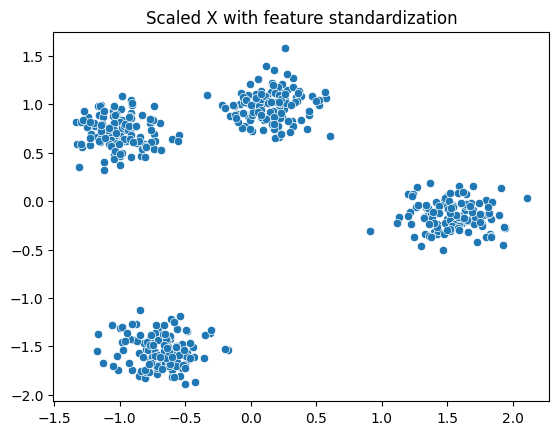

In [5]:
sns.scatterplot(x=scaled_X[:, 0], y=scaled_X[:, 1])
plt.title("Scaled X with feature standardization");

<div style="max-width:66ch;">

## k-means clustering

- k-means clustering is an unsupervised learning algorithm, which means that there are no labels

1. $k$ number of clusters are chosen
2. $k$ points are randomly selected as cluster centers
3. the nearest points to each cluster center are classified as that cluster
4. the center of the cluster is recalculated
5. repeat 3 and 4 until convergence

note that nearest points are defined by some distance metric

### Choose k

- plot an elbow plot of sum of squared distances (inertia in sklearn) and find the an inflexion point to choose $k$, i.e. the point with significant lower rate of change than before (note that this might be hard to find exact)
- domain skills, it's important to understand your dataset to find an adequate $k$ and also equally important to be able to know what the clusters represent
- note that it is hard to find correct number of clusters, and it is here the art and domain skills become more important

</div>

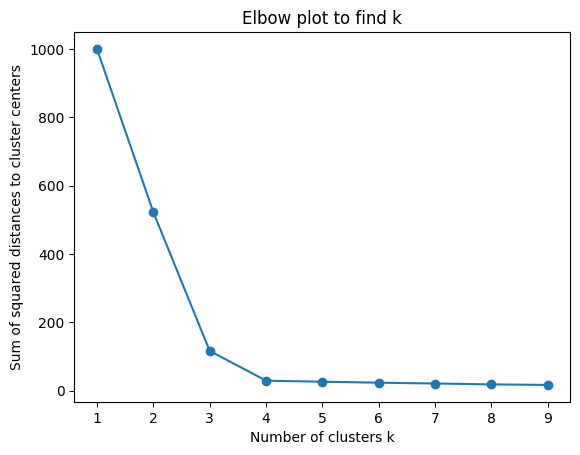

In [7]:
from sklearn.cluster import KMeans

clusters = range(1, 10)
sum_squared_distances = [KMeans(k,n_init=10).fit(scaled_X).inertia_ for k in clusters]

fig, ax = plt.figure(), plt.axes()
ax.plot(clusters, sum_squared_distances, '-o')
ax.set(title="Elbow plot to find k", xlabel="Number of clusters k",
       ylabel="Sum of squared distances to cluster centers");

# note here that it is very hard to pick 3 or 4 clusters as the clusters are close to each other 

In [8]:
SSD_differences = pd.Series(sum_squared_distances).diff()[1:]
SSD_differences.index = clusters[:-1]
SSD_differences

1   -477.842946
2   -406.061375
3    -87.308740
4     -3.124751
5     -2.775069
6     -2.404805
7     -2.568780
8     -1.576399
dtype: float64

<div style="max-width:66ch;">

## Silhouette score 

Note that it's usually not possible to plot the clusters, instead the silhouette score in combination with elbow plot can help in determining clusters. 

- silhouette score is a measure of cluster tightness

Calculate average silhouette score for different $k$ clusters in the clustering algorithm, in this case KMeans. 

- silhouette coefficient is between -1 and 1
- value 1 -> very compact clusters
- value 0 -> overlapping clusters
- value -1 -> worst value
  
</div>

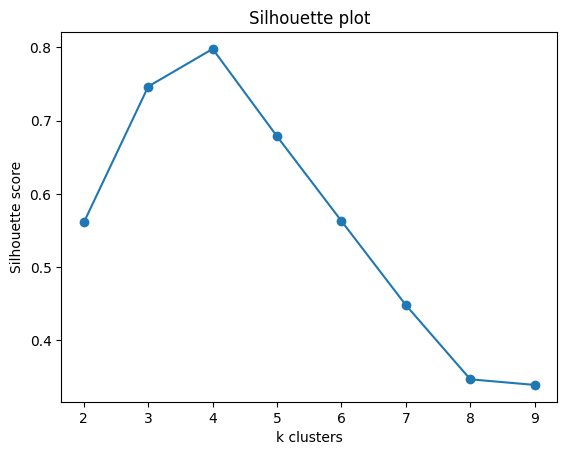

In [13]:
from sklearn.metrics import silhouette_score

fig, ax = plt.figure(), plt.axes()
kmeans = [KMeans(k,n_init=10).fit(scaled_X) for k in clusters]
silhouette_list = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
ax.plot(clusters[1:], silhouette_list, "o-")
ax.set(title = "Silhouette plot", xlabel = "k clusters", ylabel = "Silhouette score");

<div style="max-width:66ch;">

### Visualization

- note that we don't have the luxury to visualize real world data as dimensions usually are much higher than 2

</div>

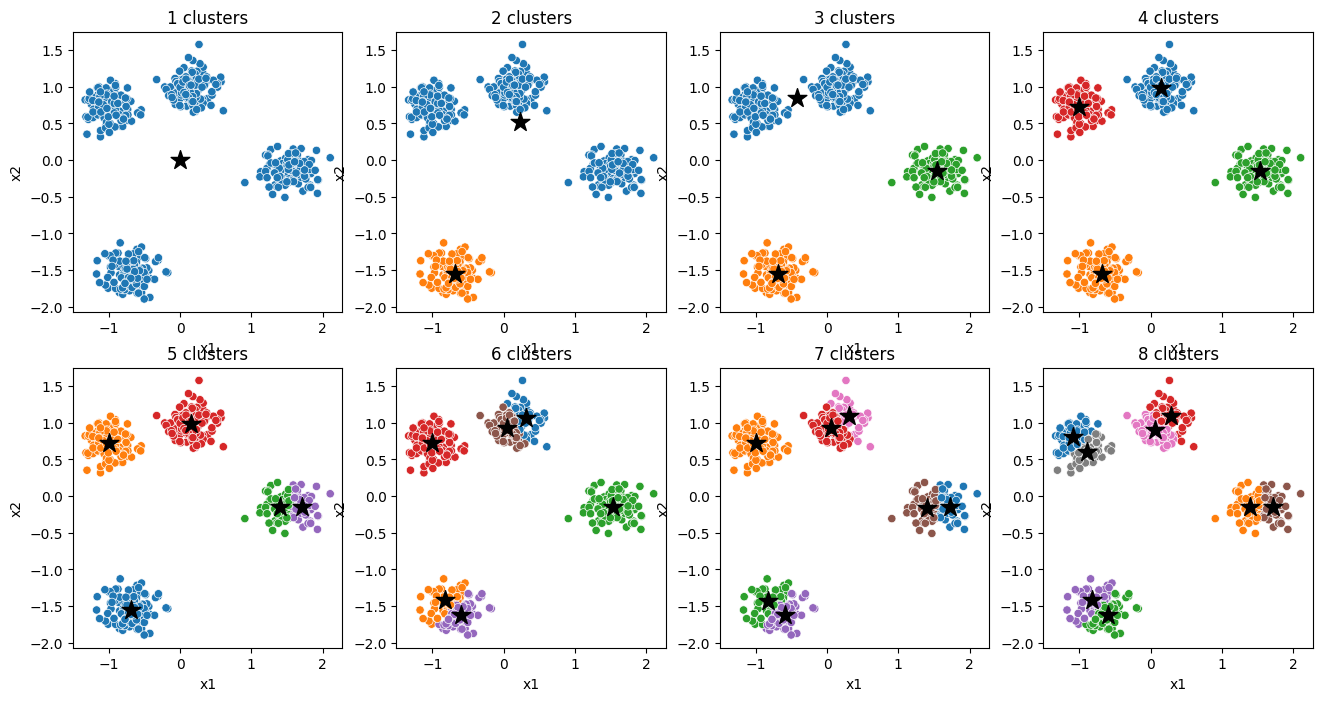

In [14]:

df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

number_plots = round(len(clusters)/2)

fig, axes = plt.subplots(2, number_plots, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data=df_plot, x="x1", y="x2",
                    hue="label", ax=ax, palette="tab10")

    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s = 200,
            marker = '*', color="black", label="centroid")
    ax.legend([],[], frameon = False)
    ax.set(title = f"{i+1} clusters")


<div style="max-width:66ch;">

## Summary

In this lecture we've covered kmeans which is an unsupervised learning algorithm. This means that we don't have any labels on the data, and what we get is a clustering of data. In order to make sense of the data, you should work closely with the domain expert. 

</div>

<div style="background-color: #FFF; color: #212121; border-radius: 1px; width:22ch; box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px; display: flex; justify-content: center; align-items: center;">
<div style="padding: 1.5em 0; width: 70%;">
    <h2 style="font-size: 1.2rem;">Kokchun Giang</h2>
    <a href="https://www.linkedin.com/in/kokchungiang/" target="_blank" style="display: flex; align-items: center; gap: .4em; color:#0A66C2;">
        <img src="https://content.linkedin.com/content/dam/me/business/en-us/amp/brand-site/v2/bg/LI-Bug.svg.original.svg" width="20"> 
        LinkedIn profile
    </a>
    <a href="https://github.com/kokchun/Portfolio-Kokchun-Giang" target="_blank" style="display: flex; align-items: center; gap: .4em; margin: 1em 0; color:#0A66C2;">
        <img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" width="20"> 
        Github portfolio
    </a>
    <span>AIgineer AB</span>
<div>
</div>
